In [ ]:
import tweepy
import pandas as pd

api_key = 'M8YKO0lOHFYeW8ncoA62FyDLX'
api_key_secret = '9AEmn0tTkBT7GNxOcGLiNV4ppKefcADpw9CkjcSb4pYtaNuxHY'
access_token = '816501343590354944-oVghmOJylz6olxbX385KnKceEPZgHVP'
access_token_secret = 'm2eQI0RYlkaq25mEnMoK3dPernoe6nY9vXlIaTGjLna2G'

# authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

# search tweets
keywords = 'ukraine war'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

print(df)

                User                                              Tweet
0           AliRawle  RT @Beany_1: Jenrick said you can’t “disaggreg...
1        OksanaLviv2  RT @JBelcourt73: it is a great source of infor...
2    cabbiecronicles  RT @TheStanislawski: Lots of things happened n...
3          pslneohio  RT @pslweb: "Profits of the fossil fuel compan...
4         ainarsbr11  RT @GlasnostGone: Thanks to Russia's genocidal...
..               ...                                                ...
295  JamesIntrepidus  @carlosvicent7 @CryptoCapo_ Very similar, 1 de...
296        ShipsCats  @ausgov This incident appears to be verified b...
297   DEFENSEEXPRESS  RT @DEFENSEEXPRESS: 271 Days of russia-Ukraine...
298  DavidGl54082417  @andrewhesselden You deserve a medal for being...
299         kar_nels  RT @IuliiaMendel: There is “mounting evidence”...

[300 rows x 2 columns]


In [ ]:
df.head()

,User,Tweet
0,AliRawle,RT @Beany_1: Jenrick said you can’t “disaggreg...
1,OksanaLviv2,RT @JBelcourt73: it is a great source of infor...
2,cabbiecronicles,RT @TheStanislawski: Lots of things happened n...
3,pslneohio,"RT @pslweb: ""Profits of the fossil fuel compan..."
4,ainarsbr11,RT @GlasnostGone: Thanks to Russia's genocidal...


In [ ]:
df.shape

(300, 2)

In [ ]:
df.info

<bound method DataFrame.info of                 User                                              Tweet
0           AliRawle  RT @Beany_1: Jenrick said you can’t “disaggreg...
1        OksanaLviv2  RT @JBelcourt73: it is a great source of infor...
2    cabbiecronicles  RT @TheStanislawski: Lots of things happened n...
3          pslneohio  RT @pslweb: "Profits of the fossil fuel compan...
4         ainarsbr11  RT @GlasnostGone: Thanks to Russia's genocidal...
..               ...                                                ...
295  JamesIntrepidus  @carlosvicent7 @CryptoCapo_ Very similar, 1 de...
296        ShipsCats  @ausgov This incident appears to be verified b...
297   DEFENSEEXPRESS  RT @DEFENSEEXPRESS: 271 Days of russia-Ukraine...
298  DavidGl54082417  @andrewhesselden You deserve a medal for being...
299         kar_nels  RT @IuliiaMendel: There is “mounting evidence”...

[300 rows x 2 columns]>

In [ ]:
df.describe(include=['object'])

,User,Tweet
count,300,300
unique,279,194
top,liseng18,RT @KimDotcom: “No one should support Ukraine”...
freq,4,21


In [ ]:
df.columns

Index(['User', 'Tweet'], dtype='object')

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
import re
import matplotlib.pyplot as plt

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

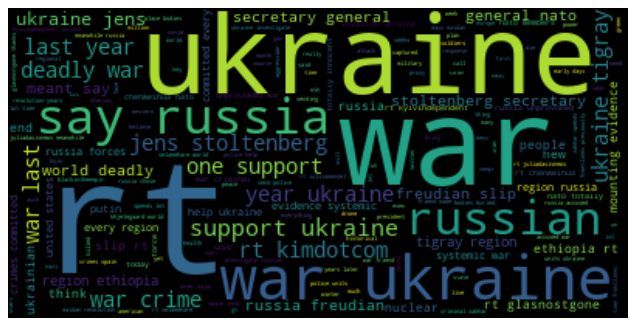

In [ ]:
# join the list and lowercase all the words
text = ' '.join(clean).lower()

#create the wordcloud object
wordcloud = WordCloud(
                      collocations=True).generate(text)

#plot the wordcloud object
plt.figure(figsize=(10, 6), dpi=80)
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [ ]:
df1 = pd.DataFrame(clean, columns = ['tweet'])

In [ ]:
df1 = df1.assign(keyword="ukraine war")

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
df1.to_csv('/drive/Shared drives/Database Systems/tweetdata.csv', mode='w', index=False, header=True)

FileNotFoundError: ignored

In [ ]:
# search tweets
keywords = 'ukraine troops'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(keyword="ukraine troops")
df1.to_csv('/drive/Shared drives/Database Systems/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = 'ukraine NATO'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(keyword="ukraine NATO")
df1.to_csv('/drive/Shared drives/Database Systems/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = 'russia invade'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(keyword="russia invade")
df1.to_csv('/drive/Shared drives/Database Systems/tweetdata.csv', mode='a', index=False)

In [ ]:
# search tweets
keywords = 'russian border ukraine'
limit=300
tweets = tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit)

# create DataFrame
columns = ['User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

stop = stopwords.words('english')
tweets=list(df['Tweet'])
clean=[]
for text in tweets:
  text=re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

  tokens = nltk.word_tokenize(text)
  
   # taken only words (not punctuation)
  token_words = [w for w in tokens if w.isalpha()]
  #remove stop words
  meaningful_words = [w for w in token_words if not w in stop]
  clean.append(( " ".join(meaningful_words)))

df1 = pd.DataFrame(clean, columns = ['tweet'])
df1 = df1.assign(keyword="russian border ukraine")
df1.to_csv('/drive/Shared drives/Database Systems/tweetdata.csv', mode='a', index=False)

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
df = pd.read_csv('/drive/Shared drives/Database Systems/tweetdata.csv')

In [ ]:
df.head(5)

,tweet,keyword
0,RT CityLab Russian attacks damaged hundreds bu...,ukraine war
1,US sees war crimes Russia Ukraine Washington A...,ukraine war
2,RT nytimes Videos surfaced social media last w...,ukraine war
3,RT KimDotcom No one support Ukraine Jens Stolt...,ukraine war
4,JustinTrudeau After Ukraine lied origins missi...,ukraine war


In [ ]:
df=df.dropna(subset=['tweet']).reset_index(drop=True)

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
df[['polarity', 'subjectivity']] = df['tweet'].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))

In [ ]:
df.head(5)

,tweet,keyword,polarity,subjectivity
0,RT CityLab Russian attacks damaged hundreds bu...,ukraine war,0.000000,0.125000
1,US sees war crimes Russia Ukraine Washington A...,ukraine war,0.500000,0.500000
2,RT nytimes Videos surfaced social media last w...,ukraine war,0.016667,0.066667
3,RT KimDotcom No one support Ukraine Jens Stolt...,ukraine war,0.050000,0.500000
4,JustinTrudeau After Ukraine lied origins missi...,ukraine war,0.000000,0.066667


In [ ]:
for index, row in df['tweet'].iteritems(): 
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    df.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    df.loc[index, 'sentiment'] = "positive"
  else:
    df.loc[index, 'sentiment'] = "neutral"
  df.loc[index, 'neg'] = neg
  df.loc[index, 'neu'] = neu
  df.loc[index, 'pos'] = pos
  df.loc[index, 'compound'] = comp

In [ ]:
df.head(5)

,tweet,keyword,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT CityLab Russian attacks damaged hundreds bu...,ukraine war,0.000000,0.125000,negative,0.345,0.655,0.000,-0.7003
1,US sees war crimes Russia Ukraine Washington A...,ukraine war,0.500000,0.500000,negative,0.420,0.532,0.048,-0.9432
2,RT nytimes Videos surfaced social media last w...,ukraine war,0.016667,0.066667,negative,0.195,0.700,0.105,-0.4215
3,RT KimDotcom No one support Ukraine Jens Stolt...,ukraine war,0.050000,0.500000,positive,0.111,0.754,0.136,0.1280
4,JustinTrudeau After Ukraine lied origins missi...,ukraine war,0.000000,0.066667,negative,0.244,0.564,0.192,-0.3400
